Demographic Analysis:

This file analyses the data from climate-ready-social-data.

Results of the analysis include identify the most populated regions in Boston, percentages of older people in a particular region etc

In [69]:
import pandas as pd

In [70]:
demographics = pd.read_csv('../data/climate-ready-social-data.csv')

In [71]:
demographics.head()
# print(list(demographics.columns))

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


In [72]:
demographics[demographics['Name'] == 'Allston']

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
7,8,25025000703,1916064.65,43.9868,2791,1418,99,31,31,1740,1771,1083,1029.60,Allston,326153.742188,3052.866729
9,10,25025000704,2580833.98,59.2478,4801,2405,301,142,113,1560,1673,1928,1802.25,Allston,439292.992188,2870.108353


In [73]:
# Check for missing values
print(demographics.isnull().sum())

FID              0
GEOID10          0
AREA_SQFT        0
AREA_ACRES       0
POP100_RE        0
HU100_RE         0
TotDis           0
TotChild         0
OlderAdult       0
Low_to_No        0
LEP              0
POC2             0
MedIllnes        0
Name             0
Shape__Area      0
Shape__Length    0
dtype: int64


In [74]:
name_counts = demographics['Name'].value_counts()
print(name_counts)

Roxbury                    23
Dorchester                 19
Roslindale                 18
Jamaica Plain              15
East Boston                14
Brighton                   14
Back Bay                   11
Mattapan                    8
South Boston                7
Charlestown                 6
Fenway                      6
North End                   6
South End                   5
Mission Hill                5
West Roxbury                5
Hyde Park                   4
West End                    3
South Boston Waterfront     3
Bay Village                 3
Allston                     2
Longwood Medical Area       1
Leather District            1
Harbor Islands              1
Name: Name, dtype: int64


- Roxbury has the highest demographics, followed by Dorchester, Roslindale, Jamaica Plain, East Boston and so on.

# Individual analysis w.r.t the neighborhood

## (1) Total population based on the neighborhood

In [75]:
max_population = demographics.groupby('Name')['POP100_RE'].sum().reset_index()
max_population = max_population.rename(columns={'POP100_RE': 'Total Population'}).set_index('Name')
print(max_population.sort_values('Total Population', ascending=False).head())

               Total Population
Name                           
Roxbury                   77812
Dorchester                69695
Roslindale                60973
Brighton                  60821
Jamaica Plain             42251


## (2) Total Housing based on the neighborhood

In [76]:
max_housing = demographics.groupby('Name')['HU100_RE'].sum().reset_index()
max_housing = max_housing.rename(columns={'HU100_RE': 'Total Housing'}).set_index('Name')
print(max_housing.sort_values('Total Housing', ascending=False).head())

               Total Housing
Name                        
Roxbury                32887
Dorchester             27507
Brighton               27143
Roslindale             25153
Jamaica Plain          18844


## (3) Total Children based on the neighborhood

In [77]:
max_children = demographics.groupby('Name')['TotChild'].sum().reset_index()
max_children = max_children.rename(columns={'TotChild': 'Total children'}).set_index('Name')
print(max_children.sort_values('Total children', ascending=False).head())


             Total children
Name                       
Roxbury               19517
Dorchester            17424
Roslindale            13324
Mattapan               8859
East Boston            8665


## (4) Total Disability based on the neighborhood

In [78]:
max_disability = demographics.groupby('Name')['TotDis'].sum().reset_index()
max_disability = max_disability.rename(columns={'TotDis': 'Total disability'}).set_index('Name')
print(max_disability.sort_values('Total disability', ascending=False).head())

            Total disability
Name                        
Roxbury                12611
Dorchester              9819
Roslindale              7286
Mattapan                5605
Brighton                5502


## (5) Total Older Adults based on the neighborhood

In [79]:
max_adult = demographics.groupby('Name')['OlderAdult'].sum().reset_index()
max_adult = max_adult.rename(columns={'OlderAdult': 'Total Older adults'}).set_index('Name')
print(max_adult.sort_values('Total Older adults', ascending=False).head())

               Total Older adults
Name                             
Roslindale                   8231
Roxbury                      6675
Dorchester                   6535
Brighton                     5847
Jamaica Plain                4381


## (6) Total Low to No Income based on the neighborhood

In [80]:
max_low_income = demographics.groupby('Name')['Low_to_No'].sum().reset_index()
max_low_income = max_low_income.rename(columns={'Low_to_No': 'Total Low Income'}).set_index('Name')
print(max_low_income.sort_values('Total Low Income', ascending=False).head())

               Total Low Income
Name                           
Roxbury                   33272
Dorchester                22749
Brighton                  17067
East Boston               13698
Jamaica Plain             12985


## (7) Total Medical Illness based on the neighborhood

In [81]:
max_medical_illness = demographics.groupby('Name')['MedIllnes'].sum().reset_index()
max_medical_illness = max_medical_illness.rename(columns={'MedIllnes': 'Total Medical Illness'}).set_index('Name')
print(max_medical_illness.sort_values('Total Medical Illness', ascending=False).head())

               Total Medical Illness
Name                                
Roxbury                     28235.10
Dorchester                  25010.76
Roslindale                  24029.32
Brighton                    23936.80
Jamaica Plain               16600.57


# Combined analysis of all the important features w.r.t the neighborhood

In [82]:
combined_df = demographics.groupby('Name')[['POP100_RE', 'HU100_RE', 'TotChild', 'TotDis', 'OlderAdult', 'Low_to_No', 'MedIllnes']].sum().reset_index()
combined_df = combined_df.rename(columns={'POP100_RE': 'Total Population', 'HU100_RE': 'Total Housing', 'TotChild': 'Total Children', 'TotDis': 'Total Disability', 'OlderAdult': 'Total Older adults', 'Low_to_No': 'Total Low Income', 'MedIllnes': 'Total Medical Illness'})
combined_df

,Name,Total Population,Total Housing,Total Children,Total Disability,Total Older adults,Total Low Income,Total Medical Illness
0,Allston,7592,3823,173,400,144,3300,2831.85
1,Back Bay,28634,18365,1686,1892,3759,5316,11842.96
2,Bay Village,10850,5076,1249,1122,1711,3929,4292.93
3,Brighton,60821,27143,4244,5502,5847,17067,23936.80
4,Charlestown,16439,8648,3301,1535,1811,4157,6461.47
5,Dorchester,69695,27507,17424,9819,6535,22749,25010.76
6,East Boston,40517,15857,8665,5180,4147,13698,14824.60
7,Fenway,27138,9243,453,1240,496,6681,10080.74
8,Harbor Islands,535,0,0,179,12,349,230.53
9,Hyde Park,16585,6592,3256,2117,2219,2683,6412.46


## (1) Percentage of Total population vs Neighborhood

In [83]:
population_df = combined_df.sort_values('Total Population', ascending = False)

total_population = combined_df['Total Population'].sum()

population_df['Percentage'] = (population_df['Total Population'] / total_population) * 100

population_df[['Name', 'Total Population', 'Percentage']].head()


,Name,Total Population,Percentage
17,Roxbury,77812,12.599032
5,Dorchester,69695,11.284757
16,Roslindale,60973,9.872523
3,Brighton,60821,9.847912
10,Jamaica Plain,42251,6.841126


- 12.5% of the entire boston population live in neighborhood: Roxbury
- 11% of the entire boston population live in neighborhood: Dorchester
- 10% of the entire boston population live in neighborhood: Roslindale
- 10% of the entire boston population live in neighborhood: Brighton
- 7% of the entire boston population live in neighborhood: Jamaica Plain

In [84]:
import folium
import json

# Load the Boston shapefile GeoJSON data
with open("../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson") as f:
    boston_geojson = json.load(f)

# Define a function that maps each neighborhood to a color
def neighborhood_color(feature):
    print('Hello')
    if feature['properties']['Name'] == 'Roxbury':
        return {'fill_color': 'red', 'color': 'black', 'weight': 1, 'fill_opacity': 0.7}
    elif feature['properties']['Name'] == 'Dorchester':
        return {'fill_color': 'green', 'color': 'black', 'weight': 1, 'fill_opacity': 0.7}
    elif feature['properties']['Name'] == 'Roslindale':
        return {'fill_color': 'blue', 'color': 'black', 'weight': 1, 'fill_opacity': 0.7}
    else:
        return {'fill_color': 'gray', 'color': 'black', 'weight': 1, 'fill_opacity': 0.7}

# Create a subset of the GeoJSON data for the neighborhoods you want to color
neighborhoods_to_color = ["Roxbury", "Dorchester", "Roslindale", 'Jamaica Plain']
boston_geojson_subset = {"type": "FeatureCollection", "features": []}
for feature in boston_geojson["features"]:
    if feature["properties"]["Name"] in neighborhoods_to_color:
        boston_geojson_subset["features"].append(feature)

# Create a map of Boston
map_boston = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

# Add the Choropleth layer to the map
folium.Choropleth(
    geo_data=boston_geojson_subset,
    name='choropleth',
    fill_opacity=0.7,
    line_opacity=0.2,
    key_on= 'feature.properties.Name',
    legend_name='Neighborhoods',
    fill_color='YlGnBu',
    highlight=True,
    style_function=neighborhood_color
).add_to(map_boston)

# Display the map
# map_boston


In [85]:
import pandas as pd
import folium

map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Population'],
    key_on='feature.properties.Name',
    # fill_color='YlGnBu',
    fill_opacity=0.6,
    line_opacity=2,
    legend_name='Total Population',
    smooth_factor=0,
    highlight=True,
    style_function=neighborhood_color,
    tooltip=folium.GeoJsonTooltip(fields=['Name', 'Total Population'], aliases=['Neighborhood', 'Population'], localize=True)
).add_to(map)

folium.LayerControl().add_to(map)

map
# map.save('population_map.html')


In [86]:
import pandas as pd
import folium

population_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Population'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Population',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(population_map)

folium.LayerControl().add_to(population_map)

population_map.save("../maps/population_boston.html")

# population_map


## (2) Percentage of Total Housing vs Neighborhood

In [87]:
housing_df = combined_df.sort_values('Total Housing', ascending = False)

total_housing = combined_df['Total Housing'].sum()

housing_df['Percentage'] = (housing_df['Total Housing'] / total_housing) * 100

housing_df[['Name', 'Total Housing', 'Percentage']].head()


,Name,Total Housing,Percentage
17,Roxbury,32887,12.069333
5,Dorchester,27507,10.094905
3,Brighton,27143,9.961319
16,Roslindale,25153,9.231001
10,Jamaica Plain,18844,6.915635


- 12% of the entire housing is in neighborhood: Roxbury
- 10% of the entire housing is in neighborhood: Dorchester
- 10% of the entire housing is in neighborhood: Brighton
- 9% of the entire housing is in neighborhood: Roslindale
- 7% of the entire housing is in neighborhood: Jamaica Plain

In [88]:
import pandas as pd
import folium

housing_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Housing'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Housing',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(housing_map)

folium.LayerControl().add_to(housing_map)

housing_map.save("../maps/housing_boston.html")

# housing_map


## (3) Percentage of Total Low Income vs Neighborhood

In [89]:
combined_df.sort_values('Total Low Income', ascending = False)[['Name', 'Total Low Income']].head()

low_income_df = combined_df.sort_values('Total Low Income', ascending = False)

total_low_income = combined_df['Total Low Income'].sum()

low_income_df['Percentage'] = (low_income_df['Total Low Income'] / total_low_income) * 100

low_income_df[['Name', 'Total Low Income', 'Percentage']].head()


,Name,Total Low Income,Percentage
17,Roxbury,33272,18.898210
5,Dorchester,22749,12.921237
3,Brighton,17067,9.693909
6,East Boston,13698,7.780346
10,Jamaica Plain,12985,7.375368


- 19% of the people who has low to no income live in neighborhood: Roxbury
- 13% of the people who has low to no income live in neighborhood: Dorchester
- 10% of the people who has low to no income live in neighborhood: Brighton
- 8% of the people who has low to no income live in neighborhood: East Boston
- 7% of the people who has low to no income live in neighborhood: Jamaica Plain

In [90]:
import pandas as pd
import folium

low_income_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Low Income'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Low Income',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(low_income_map)

folium.LayerControl().add_to(low_income_map)

low_income_map.save("../maps/low_income_boston.html")

# low_income_map


## (4) Percentage of Total Disability vs Neighborhood

In [91]:
disability_df = combined_df.sort_values('Total Disability', ascending = False)

total_disability = combined_df['Total Disability'].sum()

disability_df['Percentage'] = (disability_df['Total Disability'] / total_disability) * 100

disability_df[['Name', 'Total Disability', 'Percentage']].head()


,Name,Total Disability,Percentage
17,Roxbury,12611,17.837089
5,Dorchester,9819,13.888064
16,Roslindale,7286,10.305371
13,Mattapan,5605,7.927752
3,Brighton,5502,7.782068


- 18% of the people who has some disability live in neighborhood: Roxbury
- 13% of the people who has some disability live in neighborhood: Dorchester
- 10% of the people who has some disability live in neighborhood: Roslindale
- 8% of the people who has some disability live in neighborhood: Mattapan
- 7% of the people who has some disability live in neighborhood: Brighton

In [92]:
import pandas as pd
import folium

disability_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Disability'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Disability',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(disability_map)

folium.LayerControl().add_to(disability_map)

disability_map.save("../maps/disability_boston.html")

# disability_map


## (5) Percentage of Total Children vs Neighborhood

In [93]:
children_df = combined_df.sort_values('Total Children', ascending = False)

total_children = combined_df['Total Children'].sum()

children_df['Percentage'] = (children_df['Total Children'] / total_children) * 100

children_df[['Name', 'Total Children', 'Percentage']].head()


,Name,Total Children,Percentage
17,Roxbury,19517,18.648181
5,Dorchester,17424,16.648353
16,Roslindale,13324,12.730869
13,Mattapan,8859,8.464633
6,East Boston,8665,8.279269


- 19% of the children live in neighborhood: Roxbury
- 17% of the children live in neighborhood: Dorchester
- 13% of the children live in neighborhood: Brighton
- 8% of the children live in neighborhood: East Boston
- 8% of the children live in neighborhood: Jamaica Plain

In [94]:
import pandas as pd
import folium

children_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Children'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Children',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(children_map)

folium.LayerControl().add_to(children_map)

children_map.save("../maps/children_boston.html")

# children_map


In [95]:
adult_df = combined_df.sort_values('Total Older adults', ascending=False)

total_adults = combined_df['Total Older adults'].sum()

adult_df['Percentage'] = (adult_df['Total Older adults'] / total_adults) * 100

adult_df[['Name', 'Total Older adults', 'Percentage']].head()


,Name,Total Older adults,Percentage
16,Roslindale,8231,13.026414
17,Roxbury,6675,10.563882
5,Dorchester,6535,10.342317
3,Brighton,5847,9.253486
10,Jamaica Plain,4381,6.933388


- 13% of the older adults live in neighborhood: Roxbury
- 11% of the older adults live in neighborhood: Dorchester
- 10% of the older adults live in neighborhood: Brighton
- 9% of the older adults live in neighborhood: East Boston
- 7% of the older adults live in neighborhood: Jamaica Plain

In [96]:
import pandas as pd
import folium

older_adults_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Older adults'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Older adults',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(older_adults_map)

folium.LayerControl().add_to(older_adults_map)

older_adults_map.save("../maps/older_adults_boston.html")

# older_adults_map


In [97]:
medical_df = combined_df.sort_values('Total Medical Illness', ascending=False)

total_med_ill = combined_df['Total Medical Illness'].sum()

medical_df['Percentage'] = (medical_df['Total Medical Illness'] / total_med_ill) * 100

medical_df[['Name', 'Total Medical Illness', 'Percentage']].head()


,Name,Total Medical Illness,Percentage
17,Roxbury,28235.10,11.916660
5,Dorchester,25010.76,10.555823
16,Roslindale,24029.32,10.141605
3,Brighton,23936.80,10.102557
10,Jamaica Plain,16600.57,7.006292


In [98]:
import pandas as pd
import folium

medical_map = folium.Map(location=[42.361145, -71.057083], zoom_start=12)

folium.Choropleth(
    geo_data='../data/JSON_files/Neighborhood/Boston_Neighborhoods.geojson',
    name='choropleth',
    data=population_df,
    columns=['Name', 'Total Medical Illness'],
    key_on='feature.properties.Name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Total Medical Illness',
    smooth_factor=0,
    highlight=True,
    show=True
).add_to(medical_map)

folium.LayerControl().add_to(medical_map)

medical_map.save("../maps/medical_boston.html")

# medical_map


# Visualization of the same is as follows

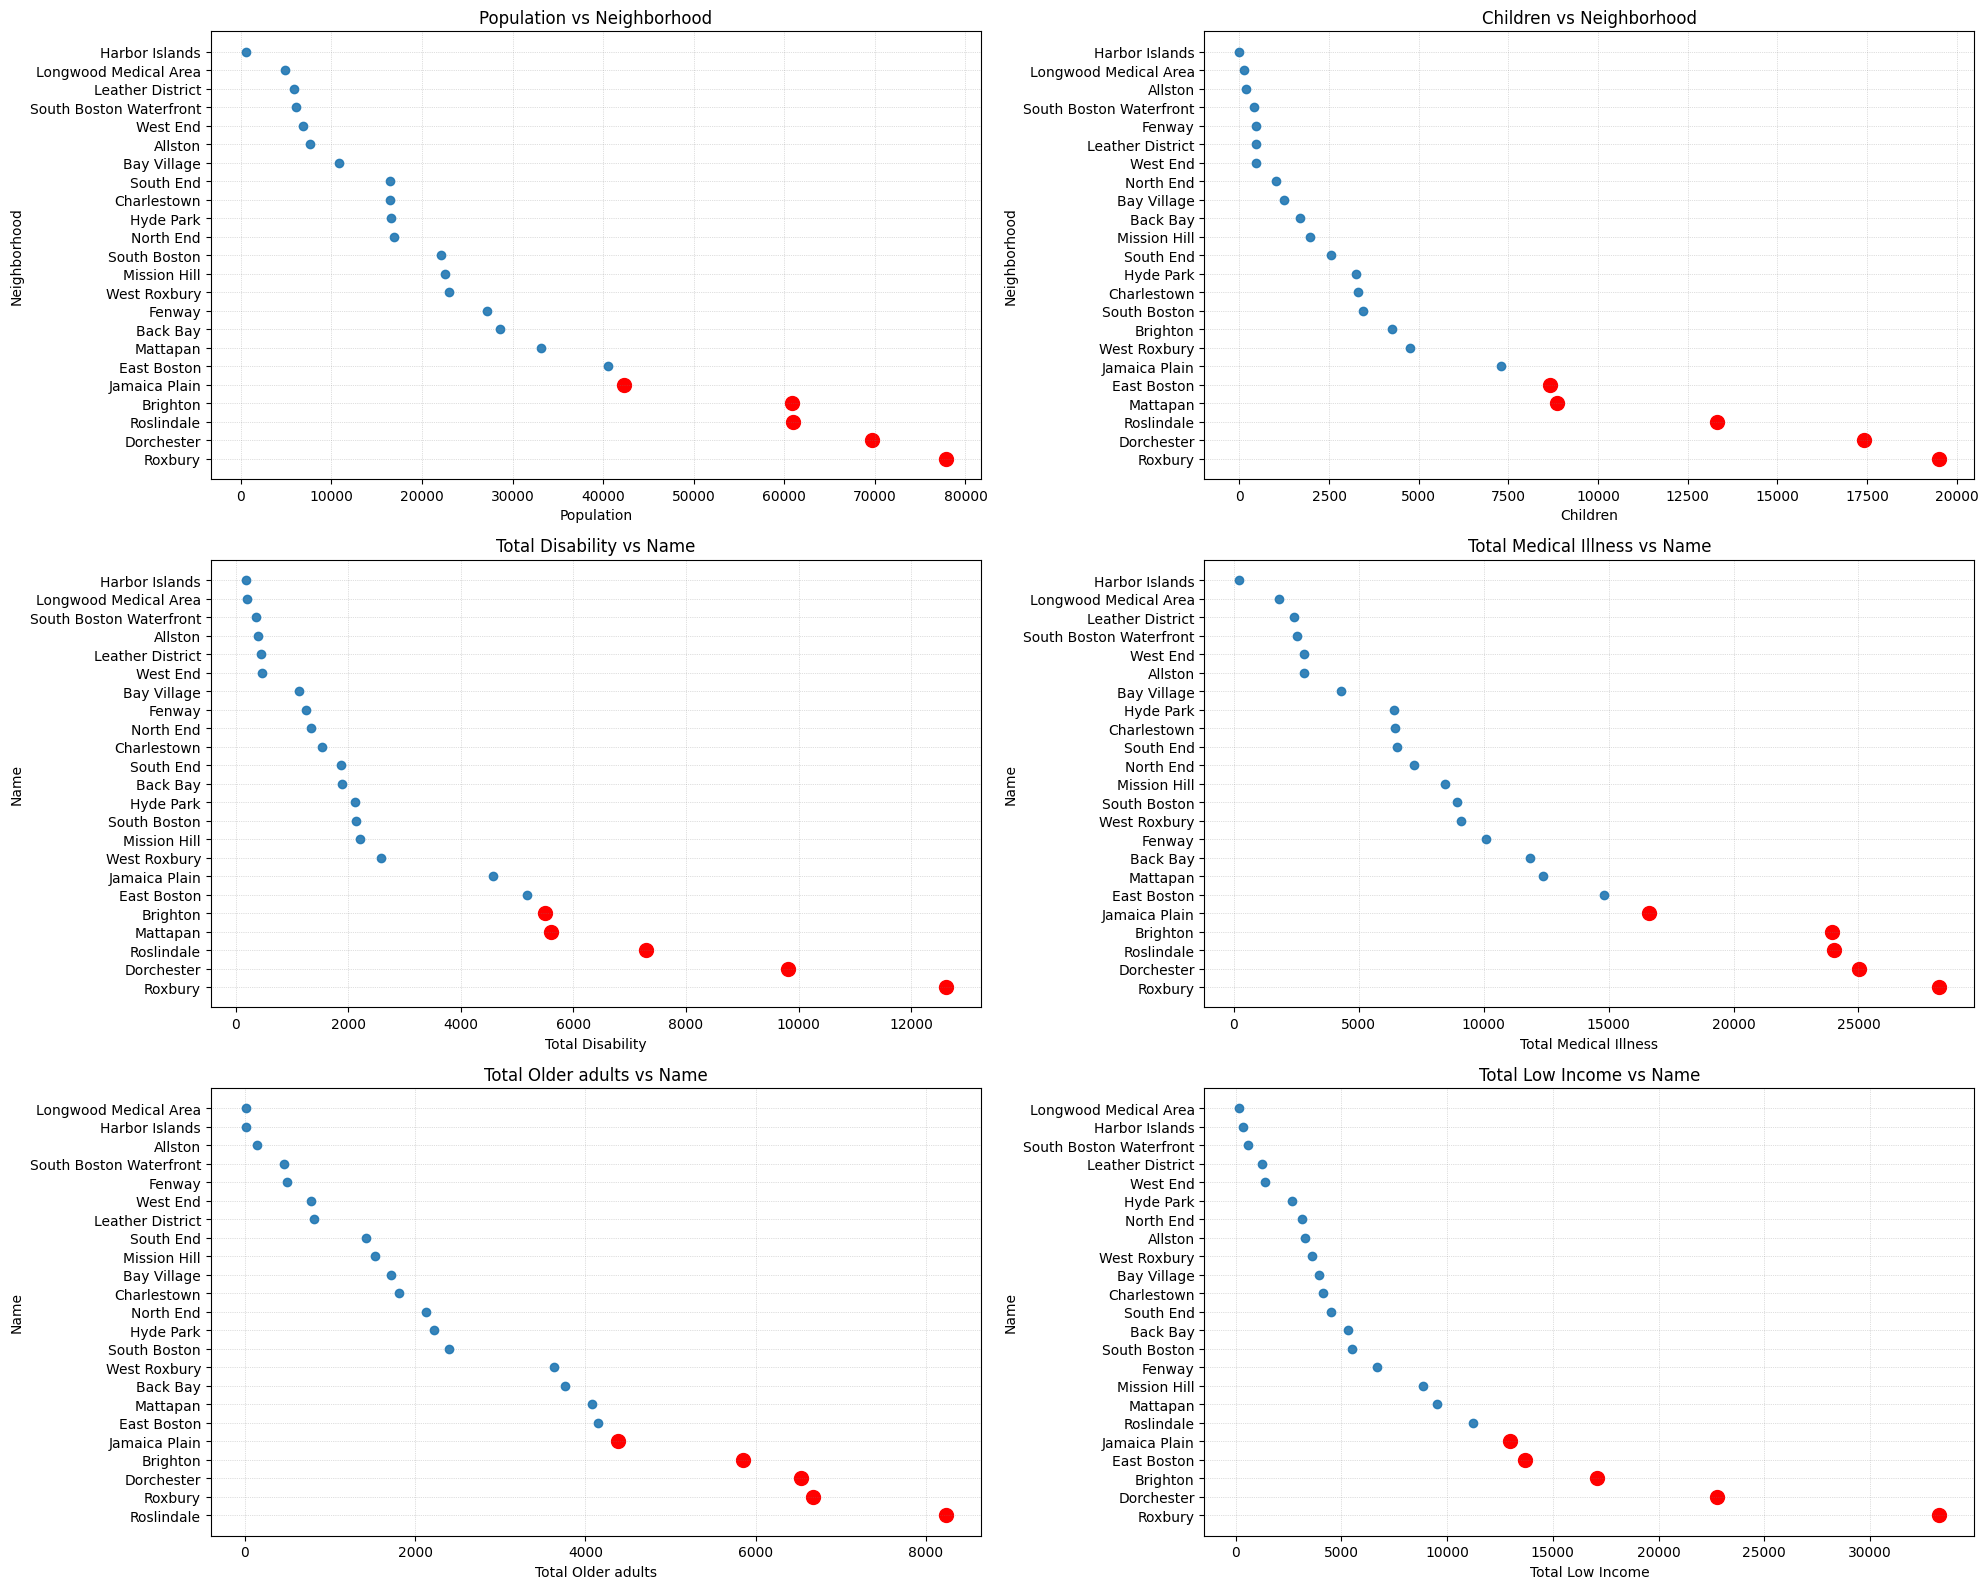

In [99]:
import matplotlib.pyplot as plt

# Create a figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

# First row of subplots
combined_df_sorted = combined_df.sort_values('Total Population', ascending=False)
axs[0, 0].scatter(combined_df_sorted['Total Population'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[0, 0].scatter(top_5['Total Population'], top_5['Name'], color='red', marker='o', s=100)
axs[0, 0].set_xlabel('Population')
axs[0, 0].set_ylabel('Neighborhood')
axs[0, 0].set_title('Population vs Neighborhood')
axs[0, 0].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

combined_df_sorted = combined_df.sort_values('Total Children', ascending=False)
axs[0, 1].scatter(combined_df_sorted['Total Children'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[0, 1].scatter(top_5['Total Children'], top_5['Name'], color='red', marker='o', s=100)
axs[0, 1].set_xlabel('Children')
axs[0, 1].set_ylabel('Neighborhood')
axs[0, 1].set_title('Children vs Neighborhood')
axs[0, 1].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)


combined_df_sorted = combined_df.sort_values('Total Disability', ascending=False)
axs[1, 0].scatter(combined_df_sorted['Total Disability'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[1, 0].scatter(top_5['Total Disability'], top_5['Name'], color='red', marker='o', s=100)
axs[1, 0].set_xlabel('Total Disability')
axs[1, 0].set_ylabel('Name')
axs[1, 0].set_title('Total Disability vs Name')
axs[1, 0].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

combined_df_sorted = combined_df.sort_values('Total Medical Illness', ascending=False)
axs[1, 1].scatter(combined_df_sorted['Total Medical Illness'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[1, 1].scatter(top_5['Total Medical Illness'], top_5['Name'], color='red', marker='o', s=100)
axs[1, 1].set_xlabel('Total Medical Illness')
axs[1, 1].set_ylabel('Name')
axs[1, 1].set_title('Total Medical Illness vs Name')
axs[1, 1].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)


combined_df_sorted = combined_df.sort_values('Total Older adults', ascending=False)
axs[2, 0].scatter(combined_df_sorted['Total Older adults'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[2, 0].scatter(top_5['Total Older adults'], top_5['Name'], color='red', marker='o', s=100)
axs[2, 0].set_xlabel('Total Older adults')
axs[2, 0].set_ylabel('Name')
axs[2, 0].set_title('Total Older adults vs Name')
axs[2, 0].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)


combined_df_sorted = combined_df.sort_values('Total Low Income', ascending=False)
axs[2, 1].scatter(combined_df_sorted['Total Low Income'], combined_df_sorted['Name'], alpha=0.9)
top_5 = combined_df_sorted.head(5)
axs[2, 1].scatter(top_5['Total Low Income'], top_5['Name'], color='red', marker='o', s=100)
axs[2, 1].set_xlabel('Total Low Income')
axs[2, 1].set_ylabel('Name')
axs[2, 1].set_title('Total Low Income vs Name')
axs[2, 1].grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()

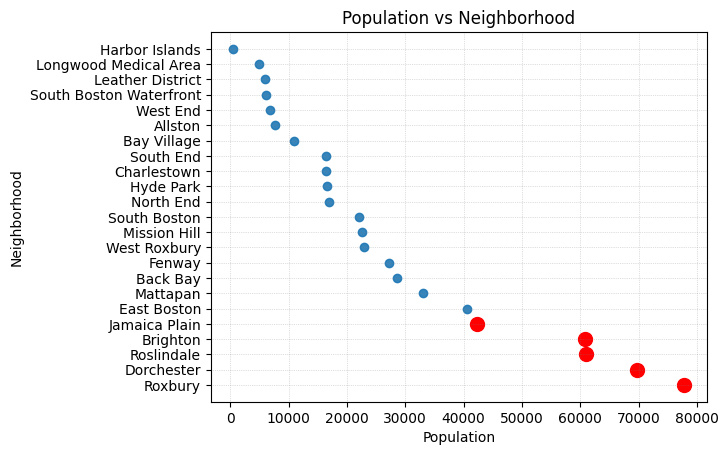

In [100]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Population', ascending=False)

plt.scatter(combined_df_sorted['Total Population'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Population'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('Population vs Neighborhood')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


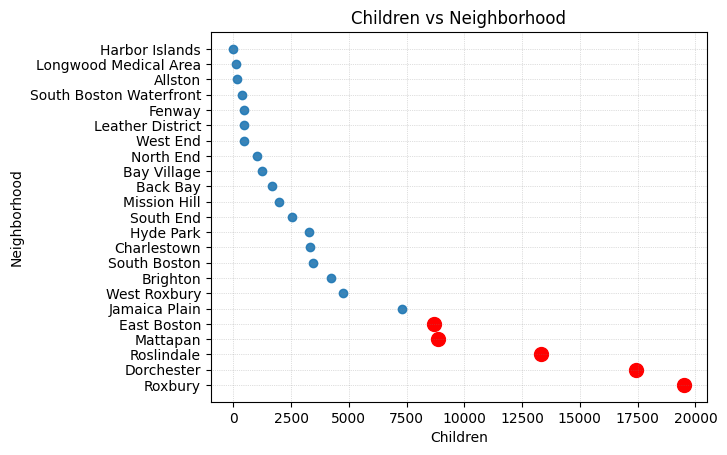

In [101]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Children', ascending=False)

plt.scatter(combined_df_sorted['Total Children'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Children'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Children')
plt.ylabel('Neighborhood')
plt.title('Children vs Neighborhood')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


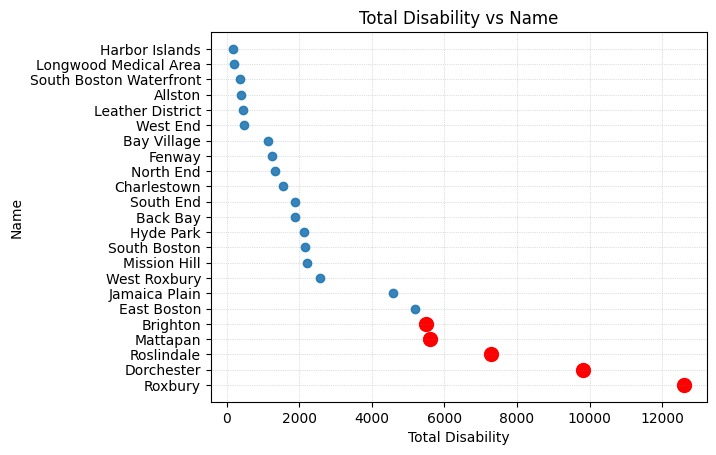

In [102]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Disability', ascending=False)

plt.scatter(combined_df_sorted['Total Disability'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Disability'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Disability')
plt.ylabel('Name')
plt.title('Total Disability vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


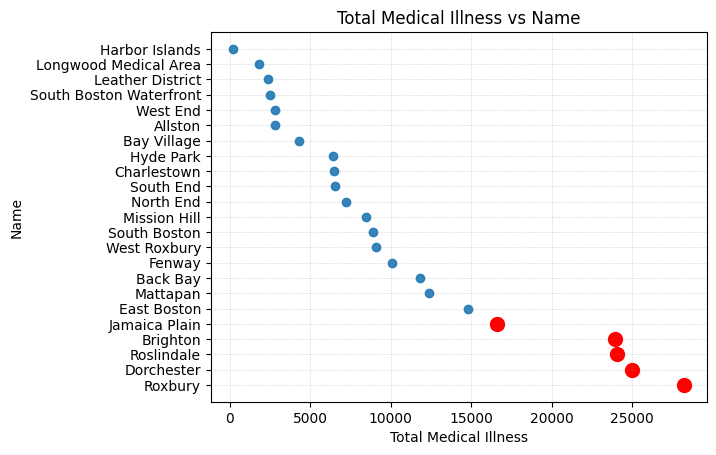

In [103]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Medical Illness', ascending=False)

plt.scatter(combined_df_sorted['Total Medical Illness'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Medical Illness'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Medical Illness')
plt.ylabel('Name')
plt.title('Total Medical Illness vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


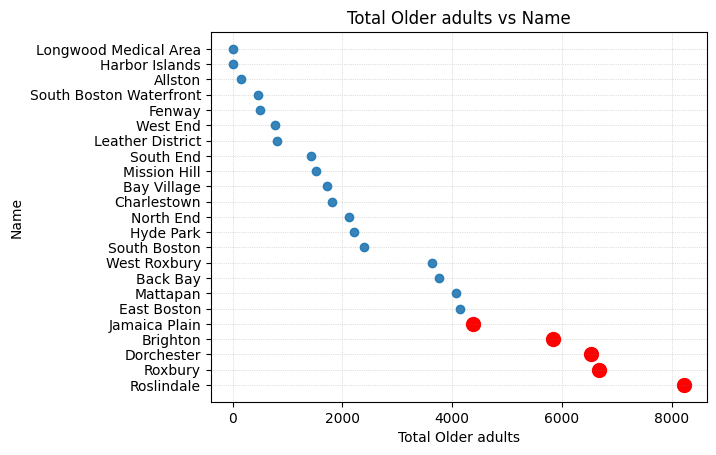

In [104]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Older adults', ascending=False)

plt.scatter(combined_df_sorted['Total Older adults'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Older adults'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Older adults')
plt.ylabel('Name')
plt.title('Total Older adults vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


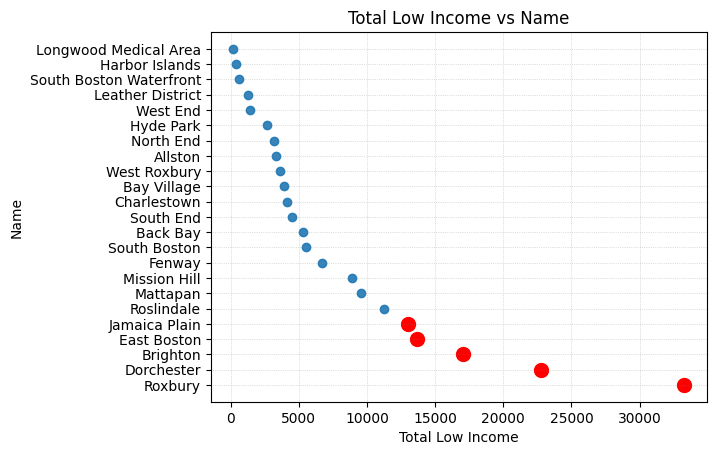

In [105]:
import matplotlib.pyplot as plt

combined_df_sorted = combined_df.sort_values('Total Low Income', ascending=False)

plt.scatter(combined_df_sorted['Total Low Income'], combined_df_sorted['Name'], alpha=0.9)

top_5 = combined_df_sorted.head(5)
plt.scatter(top_5['Total Low Income'], top_5['Name'], color='red', marker='o', s=100)

plt.xlabel('Total Low Income')
plt.ylabel('Name')
plt.title('Total Low Income vs Name')
plt.grid(linestyle=':', linewidth='0.5', color='gray', alpha=0.5)

plt.show()


In [106]:
import pandas as pd

csv_file = pd.read_csv("../data/preprocessed_sidewalks_hazards.csv")
csv_file.head()

,Unnamed: 0.1,Unnamed: 0,Type,GlobalID,CreationDa,Creator,EditDate,Editor,geometry,address,pincode,x,y
0,0,0,Trip hazards not due to tree roots,1f823362-3158-4962-a052-63c0423f0920,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910200.2581 5215757.319600001),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058538,42.364634
1,1,1,Trip hazards not due to tree roots,ff26eb97-df6d-4397-818d-039286455d6e,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910200.8184 5215760.144199997),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058543,42.364653
2,2,2,Trip hazards not due to tree roots,08a1879f-4d56-4f87-9bff-56a6f2afcce1,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910197.051000002 5215768.779700004),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058509,42.364710
3,3,3,Trip hazards not due to tree roots,f16493e6-ae37-400b-b4e8-03e29a628101,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7909968.1286 5215370.892200001),{'tourism': 'Canopy by Hilton Boston Downtown'...,2201,-71.056453,42.362069
4,4,4,Trip hazards not due to tree roots,5ea5e09e-c351-4777-ae62-120cb83eee07,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7909975.9311 5215370.464400001),{'tourism': 'Canopy by Hilton Boston Downtown'...,2201,-71.056523,42.362066


In [107]:
import json
csv_file["road"] = csv_file["address"].apply(lambda x: eval(x).get("road"))
csv_file["county"] = csv_file["address"].apply(lambda x: eval(x).get("county"))
csv_file["neighbourhood"] = csv_file["address"].apply(lambda x: eval(x).get("neighbourhood"))

csv_file

,Unnamed: 0.1,Unnamed: 0,Type,GlobalID,CreationDa,Creator,EditDate,Editor,geometry,address,pincode,x,y,road,county,neighbourhood
0,0,0,Trip hazards not due to tree roots,1f823362-3158-4962-a052-63c0423f0920,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910200.2581 5215757.319600001),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058538,42.364634,MA 3,Suffolk County,None
1,1,1,Trip hazards not due to tree roots,ff26eb97-df6d-4397-818d-039286455d6e,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910200.8184 5215760.144199997),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058543,42.364653,MA 3,Suffolk County,None
2,2,2,Trip hazards not due to tree roots,08a1879f-4d56-4f87-9bff-56a6f2afcce1,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7910197.051000002 5215768.779700004),"{'road': 'MA 3', 'suburb': 'West End', 'city':...",2113,-71.058509,42.364710,MA 3,Suffolk County,None
3,3,3,Trip hazards not due to tree roots,f16493e6-ae37-400b-b4e8-03e29a628101,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7909968.1286 5215370.892200001),{'tourism': 'Canopy by Hilton Boston Downtown'...,2201,-71.056453,42.362069,Blackstone Street,Suffolk County,Dock Square
4,4,4,Trip hazards not due to tree roots,5ea5e09e-c351-4777-ae62-120cb83eee07,2020-04-28,Enmanuel.Raposo_stantec,2020-04-28,Enmanuel.Raposo_stantec,POINT (-7909975.9311 5215370.464400001),{'tourism': 'Canopy by Hilton Boston Downtown'...,2201,-71.056523,42.362066,Blackstone Street,Suffolk County,Dock Square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,6988,6988,Trip hazards due to tree roots,28dda62b-00f9-4d0d-a3b5-2f9b1affb538,2021-06-11,william.scarpati_stantec,2021-06-11,william.scarpati_stantec,POINT (-7910378.773 5206116.318099998),"{'house_number': '1460-1474', 'road': 'Dorches...",2122,-71.060142,42.300610,Dorchester Avenue,Suffolk County,Fields Corner
6989,6989,6989,Trip hazards due to tree roots,cba2435c-ee48-46eb-bffe-27d2abbdd31c,2021-06-11,william.scarpati_stantec,2021-06-11,william.scarpati_stantec,POINT (-7910422.7037 5205991.754199997),"{'house_number': '1485-1491', 'road': 'Dorches...",2122,-71.060536,42.299783,Dorchester Avenue,Suffolk County,Fields Corner
6990,6990,6990,Trip hazards due to tree roots,164102b2-6c84-4745-8eff-7f682af920db,2021-06-11,william.scarpati_stantec,2021-06-11,william.scarpati_stantec,POINT (-7910435.8676 5205884.563000001),"{'amenity': 'Blarney Stone', 'road': 'Dorchest...",2212,-71.060654,42.299070,Dorchester Avenue,Suffolk County,Fields Corner
6991,6991,6991,Fixed pinch point <36” sidewalk width,47ee9771-854d-44bc-b268-7f0dace3ddb8,2021-06-18,william.scarpati_stantec,2021-06-18,william.scarpati_stantec,POINT (-7909128.988500002 5213540.038400002),{'building': 'The Artist Building at 300 Summe...,2210,-71.048915,42.349915,Summer Street,Suffolk County,Seaport


In [108]:
import folium
from folium import plugins, Map

csv_file['x'] = csv_file['x'].astype(float)
csv_file['y'] = csv_file['y'].astype(float)

def color_cluster(index):
    if index == "Fixed pinch point <36” sidewalk width":
        return 'green'
    elif index == "Trip hazards due to tree roots":
        return 'blue'
    elif index == "Trip hazards not due to tree roots": 
        return 'red'
    else:
        return 'yellow'


for point in range(0, len(csv_file)):
    folium.CircleMarker([csv_file.iloc[point]['y'], 
                        csv_file.iloc[point]['x']],
                        color = color_cluster(csv_file.iloc[point]['Type']),
                        fill = True, 
                        fill_color = color_cluster(csv_file.iloc[point]['Type'])).add_to(disability_map)


In [109]:
disability_map.save('../maps/disability_with_hazards.html')

# disability_map